In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Exploration

In [2]:
airbnb = pd.read_csv(r"C:\Users\arist\Downloads\Airbnb\airbnb_train.csv")
airbnb_test=pd.read_csv(r"C:\Users\arist\Downloads\Airbnb\airbnb_test.csv")
airbnb.head()


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5708593,4.317488,House,Private room,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",3,1.0,Real Bed,flexible,False,...,NaN,33.782712,-118.134410,Island style Spa Studio,Long Beach,0,NaN,90804,0.0,2.0
1,14483613,4.007333,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",4,2.0,Real Bed,strict,False,...,2017-09-17,40.705468,-73.909439,"Beautiful and Simple Room W/2 Beds, 25 Mins to...",Ridgewood,38,86.0,11385,1.0,2.0
2,10412649,7.090077,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",6,2.0,Real Bed,flexible,False,...,NaN,38.917537,-77.031651,2br/2ba luxury condo perfect for infant / toddler,U Street Corridor,0,NaN,20009,2.0,2.0
3,17954362,3.555348,House,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,flexible,True,...,2017-09-29,40.736001,-73.924248,Manhattan view from Queens. Lovely single room .,Sunnyside,19,96.0,11104,1.0,1.0
4,9969781,5.480639,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,moderate,True,...,2017-08-28,37.744896,-122.430665,Zen Captured Noe Valley House,Noe Valley,15,96.0,94131,2.0,2.0


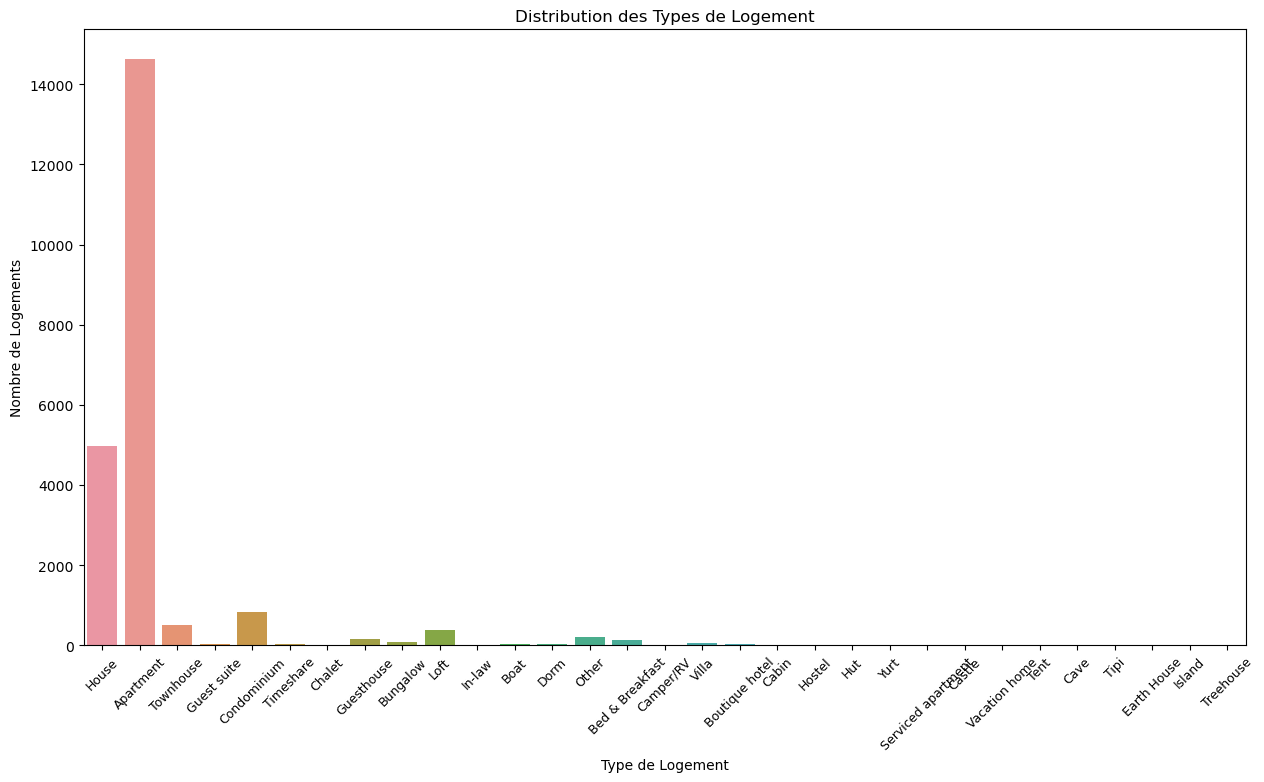

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 8))
sns.countplot(data=airbnb, x='property_type')
plt.title('Distribution des Types de Logement')
plt.xlabel('Type de Logement')
plt.ylabel('Nombre de Logements')
plt.xticks(rotation=45, fontsize=9)
plt.show()

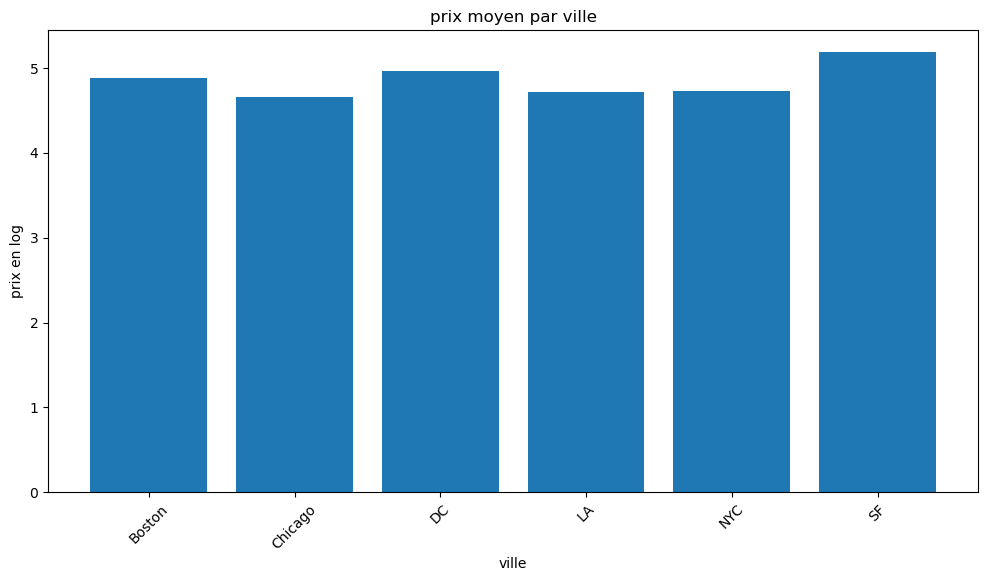

In [21]:
average_price_by_city = airbnb.groupby('city')['log_price'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(average_price_by_city['city'], average_price_by_city['log_price'])
plt.xlabel('ville')
plt.ylabel('prix en log')
plt.title('prix moyen par ville')
plt.xticks(rotation=45)
plt.show()

In [3]:
airbnb_test=pd.read_csv(r"C:\Users\arist\Downloads\Airbnb\airbnb_test.csv")
airbnb_test.head()

,Unnamed: 0,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,14282777,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0
1,17029381,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0
2,7824740,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0
3,19811650,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,94117.0,2.0,2.0
4,12410741,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0


# Nettoyage des données

In [ ]:
airbnb_test=pd.read_csv(r"C:\Users\arist\Downloads\Airbnb\airbnb_test.csv")
airbnb_test.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
airbnb_test.head()


In [5]:
# Colonnes à éliminer
colonnes_a_eliminer = [
    'bed_type', 'description', 'first_review', 'host_has_profile_pic',
    'host_identity_verified', 'host_response_rate', 'host_since', 
    'instant_bookable', 'last_review', 'latitude', 'longitude', 
    'name', 'neighbourhood'
]

# Fonction pour éliminer les colonnes spécifiées
def eliminer_colonnes(airbnb, colonnes_a_eliminer):
    return airbnb.drop(colonnes_a_eliminer, axis=1)

# Éliminer les colonnes inutiles
airbnb1 = eliminer_colonnes(airbnb, colonnes_a_eliminer)
airbnb_test1=eliminer_colonnes(airbnb_test, colonnes_a_eliminer)
# Afficher les premières lignes des données modifiées
print(airbnb1.head())


         id  log_price property_type        room_type  \
0   5708593   4.317488         House     Private room   
1  14483613   4.007333         House     Private room   
2  10412649   7.090077     Apartment  Entire home/apt   
3  17954362   3.555348         House     Private room   
4   9969781   5.480639         House  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {TV,"Wireless Internet",Kitchen,"Free parking ...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             4        2.0   
2  {TV,"Wireless Internet","Air conditioning",Kit...             6        2.0   
3  {TV,"Cable TV",Internet,"Wireless Internet","A...             1        1.0   
4  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   

  cancellation_policy  cleaning_fee city  number_of_reviews  \
0            flexible         False   LA                  0   
1              strict         False  NYC    

In [6]:
# Remplacer les valeurs manquantes par la médiane pour les colonnes numériques
numerical_cols = airbnb1.select_dtypes(include=['number']).columns
airbnb1[numerical_cols] = airbnb1[numerical_cols].fillna(airbnb1[numerical_cols].median())

# Pour les colonnes catégorielles, remplacer les valeurs manquantes par le mode
categorical_cols = airbnb1.select_dtypes(include=['object']).columns
for column in categorical_cols:
    airbnb1[column].fillna(airbnb1[column].mode()[0], inplace=True)

# Afficher les premières lignes des données modifiées
print(airbnb1.head())


         id  log_price property_type        room_type  \
0   5708593   4.317488         House     Private room   
1  14483613   4.007333         House     Private room   
2  10412649   7.090077     Apartment  Entire home/apt   
3  17954362   3.555348         House     Private room   
4   9969781   5.480639         House  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {TV,"Wireless Internet",Kitchen,"Free parking ...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             4        2.0   
2  {TV,"Wireless Internet","Air conditioning",Kit...             6        2.0   
3  {TV,"Cable TV",Internet,"Wireless Internet","A...             1        1.0   
4  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   

  cancellation_policy  cleaning_fee city  number_of_reviews  \
0            flexible         False   LA                  0   
1              strict         False  NYC    

In [7]:
# Remplacer les valeurs manquantes par la médiane pour les colonnes numériques
numerical_cols_test = airbnb_test1.select_dtypes(include=['number']).columns
airbnb_test1[numerical_cols_test] = airbnb_test1[numerical_cols_test].fillna(airbnb_test1[numerical_cols_test].median())

# Pour les colonnes catégorielles, remplacer les valeurs manquantes par le mode
categorical_cols_test = airbnb_test1.select_dtypes(include=['object']).columns
for column in categorical_cols_test:
    airbnb_test1[column].fillna(airbnb_test1[column].mode()[0], inplace=True)

# Afficher les premières lignes des données modifiées
print(airbnb_test1.head())


         id property_type        room_type  \
0  14282777     Apartment  Entire home/apt   
1  17029381     Apartment  Entire home/apt   
2   7824740     Apartment  Entire home/apt   
3  19811650         House  Entire home/apt   
4  12410741     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

  cancellation_policy  cleaning_fee city  number_of_reviews  \
0              strict          True  NYC                  2   
1              strict          True  NYC                  6   
2            moderate          True  NYC       

In [8]:
from sklearn.preprocessing import LabelEncoder

# Encodage des variables catégorielles
label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    airbnb1[column] = le.fit_transform(airbnb1[column])
    label_encoders[column] = le

# Afficher les premières lignes des données modifiées
print(airbnb1.head())



         id  log_price  property_type  room_type  amenities  accommodates  \
0   5708593   4.317488             16          1      15899             3   
1  14483613   4.007333             16          1       1803             4   
2  10412649   7.090077              0          0      13263             6   
3  17954362   3.555348             16          1      10269             1   
4   9969781   5.480639             16          0      12091             4   

   bathrooms  cancellation_policy  cleaning_fee  city  number_of_reviews  \
0        1.0                    0         False     3                  0   
1        2.0                    2         False     4                 38   
2        2.0                    0         False     2                  0   
3        1.0                    0          True     4                 19   
4        1.0                    1          True     5                 15   

   review_scores_rating  zipcode  bedrooms  beds  
0                  96.0      

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encodage des variables catégorielles
label_encoders = {}
for column in categorical_cols_test:
    le = LabelEncoder()
    airbnb_test1[column] = le.fit_transform(airbnb_test1[column])
    label_encoders[column] = le

# Afficher les premières lignes des données modifiées
airbnb_test1.head()

airbnb_test1.dtypes

id                        int64
property_type             int32
room_type                 int32
amenities                 int32
accommodates              int64
bathrooms               float64
cancellation_policy       int32
cleaning_fee               bool
city                      int32
number_of_reviews         int64
review_scores_rating    float64
zipcode                   int32
bedrooms                float64
beds                    float64
dtype: object

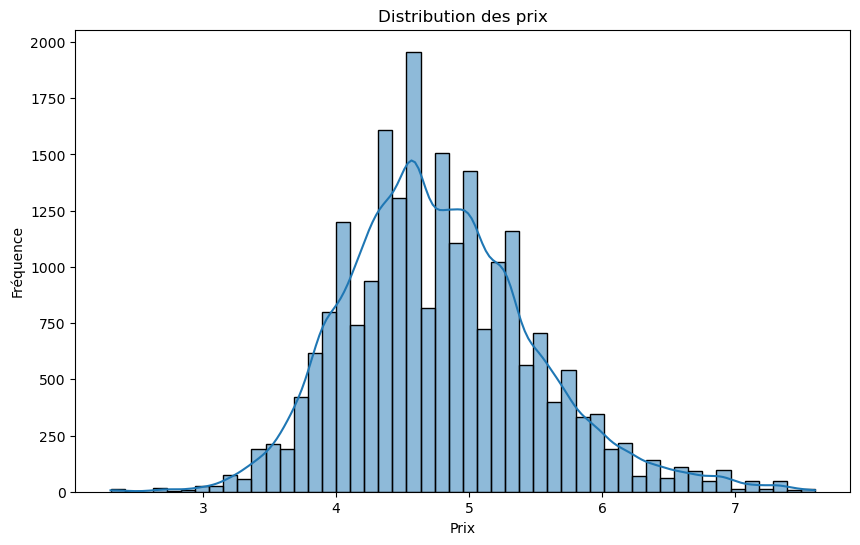

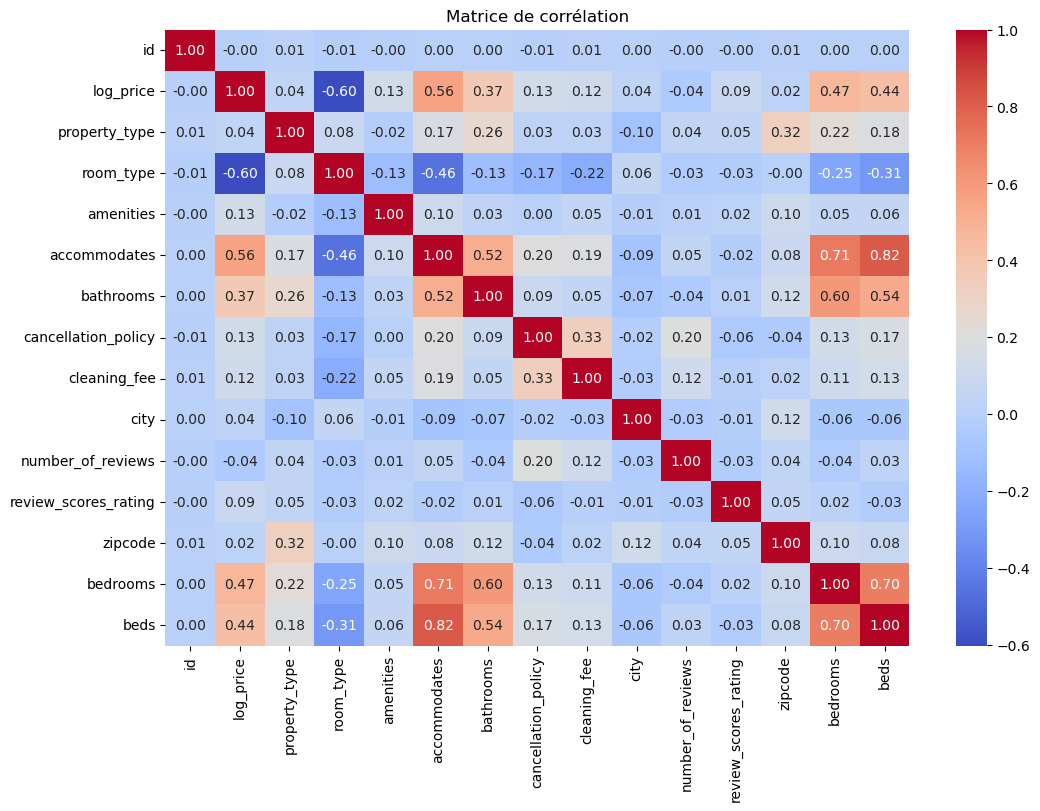

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution des prix
plt.figure(figsize=(10, 6))
sns.histplot(airbnb1['log_price'], bins=50, kde=True)
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()

# Matrice de corrélation
plt.figure(figsize=(12, 8))
corr_matrix = airbnb1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()


# Normalisation

In [11]:
from sklearn.model_selection import train_test_split

# Définir les caractéristiques (features) et la variable cible (target)
X = airbnb1.drop('log_price', axis=1)
y = airbnb1['log_price']
m=X.mean(axis=0)
s=X.std(axis=0)
X=(X-m)/s
#PCA on obtient des mauvais résultats probleme supposition de linéarité ce qui est faux du à des prix abérrants
#pca = PCA(n_components=2)  # Choisissez le nombre de composantes principales que vous voulez conserver
#X = pca.fit_transform(X)
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Apprentissage

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Modèle de Régression Linéaire
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Évaluation du modèle de Régression Linéaire
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)
print(f'Régression Linéaire - RMSE: {lr_rmse}, R2: {lr_r2}')

# Modèle de Forêt Aléatoire
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Évaluation du modèle de Forêt Aléatoire
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)
print(f'Forêt Aléatoire - RMSE: {rf_rmse}, R2: {rf_r2}')

# Modèle de Régression par Descente de Gradient
sgd_model = SGDRegressor()
sgd_model.fit(X_train, y_train)
sgd_pred = sgd_model.predict(X_test)

# Modèle de Régression par Support Vector Machine
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Évaluation des modèles
def evaluate_model(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

sgd_rmse, sgd_r2 = evaluate_model(y_test, sgd_pred)
svm_rmse, svm_r2 = evaluate_model(y_test, svm_pred)

print("Descente de Gradient - RMSE: {:.2f}, R2 Score: {:.2f}".format(sgd_rmse, sgd_r2))
print("Support Vector Machine - RMSE: {:.2f}, R2 Score: {:.2f}".format(svm_rmse, svm_r2))


Régression Linéaire - RMSE: 0.49497593181301885, R2: 0.5217568871134313
Forêt Aléatoire - RMSE: 0.42532655317417445, R2: 0.6468773671018099
Descente de Gradient - RMSE: 0.50, R2 Score: 0.52
Support Vector Machine - RMSE: 0.45, R2 Score: 0.60


# Apliquer sur le fichier test

In [13]:
# Supprimer la colonne 'rf_predictions' si elle existe
if 'rf_predictions' in airbnb_test1.columns:
    airbnb_test1.drop('rf_predictions', axis=1, inplace=True)

# Prédiction avec le modèle de forêt aléatoire
rf_test_pred = rf_model.predict(airbnb_test1)

# Ajouter les prédictions au dataframe de test
airbnb_test1['rf_predictions'] = rf_test_pred


# Stoquer le résultat sur un fichier csv

In [19]:
# Enregistrer les prédictions dans un fichier Excel
airbnb_test1[['id', 'rf_predictions']].to_csv('predictions_forest_aleatoire_test.csv', index=False)
predictions_df = pd.read_csv('predictions_forest_aleatoire_test.csv')

# Afficher les premières lignes du dataframe
print(predictions_df.head())


         id  rf_predictions
0  14282777        5.684411
1  17029381        6.157155
2   7824740        5.702568
3  19811650        5.847572
4  12410741        5.646458
